In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
from skimage import measure
from skimage.color import label2rgb
from pycocotools.coco import COCO

import json
import os



In [2]:
image_dir = './data/d2s_images_v1/images'
os.listdir(image_dir)[:10]

['D2S_060828.jpg',
 'D2S_037323.jpg',
 'D2S_99002956.jpg',
 'D2S_067022.jpg',
 'D2S_022202.jpg',
 'D2S_046718.jpg',
 'D2S_062313.jpg',
 'D2S_99007180.jpg',
 'D2S_021023.jpg',
 'D2S_99008165.jpg']

In [3]:
annotations_dir = './data/d2s_annotations_v1.1/annotations'
os.listdir(annotations_dir)

['D2S_test_info_random_background_wo_clutter.json',
 'D2S_training_light0.json',
 'D2S_test_info_clutter.json',
 'D2S_validation.json',
 'D2S_test_info.json',
 'D2S_augmented.json',
 'D2S_training.json',
 'D2S_training_rot0.json',
 'D2S_validation_wo_occlusion.json',
 'D2S_validation_random_background.json',
 'D2S_validation_random_background_wo_clutter.json',
 'D2S_training_rot0_light0.json',
 'D2S_test_info_random_background.json',
 'D2S_validation_occlusion.json',
 'D2S_test_info_wo_occlusion.json',
 'D2S_validation_clutter.json',
 'D2S_test_info_occlusion.json']

In [7]:
with open(f'combined_dict.json') as file_object:
        # store file data in object
        data = json.load(file_object)
print(data.keys())

dict_keys(['images', 'info', 'licenses', 'categories', 'annotations'])


In [31]:
data['images'][0]

{'file_name': 'D2S_000200.jpg',
 'height': 1440,
 'id': 200,
 'license': 1,
 'width': 1920}

In [32]:
print(data['images'][0].keys())

dict_keys(['file_name', 'height', 'id', 'license', 'width'])


In [33]:
print(data['annotations'][0].keys())

dict_keys(['segmentation', 'area', 'iscrowd', 'image_id', 'bbox', 'category_id', 'id'])


In [34]:
for x in data['annotations']:
    if data['images'][0]['id'] == x['image_id']:
        print(x)

{'segmentation': {'counts': '[T_S13i\\18I7I6I8I7I7H7J7I7H6K3M4K4M3L4M4L3L4M4L3L4M3M4K4M3M3L5L3L4M4L3L4M3M4K4M3M4K4M3M3L5L3M3L5L3L4M3M4K4M3M3L5L3M3L5L3M3L4M4K4M3M4K4M3M3L5L3M3L4M4L3L4N3O01O0001O01O01O01O0001O01O01O01O0001O01O00010O0001O01O00010O0001O01O00010O0001O01O00010O0000010O00010O0000010O00010O0000010O000010O000010O000010O000010O000010O000010O000010O0000010O00010O0000010O00010O0000010O00010O0000010O0001O01O00010O0001O01O00010O0001O01O0001O01O01O01O0001O01O01O01O0001O01O01O01O0001O01O01O0001O01O01O01O0001O01O01O01O0001O01O01O01O0001O01O00010O0001O01O0001O01O01O01O0001O01O00010O0001O01O00010O0001O01O00010O0001O01O00010O0000010O00010O0000010O00010O0000010O00010O0000010O000010O000010O000010O000010O000010O0000010O00010O0000010O00O2N1N2O1O2N1N2O2N1N2O1O2N1N2O2N1O1N2O2N1N2O2M2L4M3L5L3L4M4K4L4M3L5L3L4M4K4M3L4M4K4M3L5K4M3L4M4K4M3L5L3L4M3L5L3L4M4K4L4M3L5L3L4M4K4M3L4M4K4M3L5K4M3L4M4K4M3L5L3L4M3L5L3L4L5L3L4M3L5L3LT^_m0', 'size': [1440, 1920]}, 'area': 110687.0, 'iscrowd': 0, 'image_id': 200, 

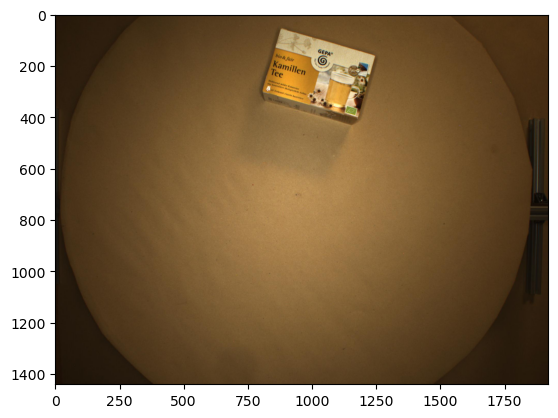

In [46]:
img = Image.open(f"{image_dir}/{data['images'][0]['file_name']}")
plt.imshow(img)

In [47]:
print(data['annotations'][0])

{'segmentation': {'counts': '[T_S13i\\18I7I6I8I7I7H7J7I7H6K3M4K4M3L4M4L3L4M4L3L4M3M4K4M3M3L5L3L4M4L3L4M3M4K4M3M4K4M3M3L5L3M3L5L3L4M3M4K4M3M3L5L3M3L5L3M3L4M4K4M3M4K4M3M3L5L3M3L4M4L3L4N3O01O0001O01O01O01O0001O01O01O01O0001O01O00010O0001O01O00010O0001O01O00010O0001O01O00010O0000010O00010O0000010O00010O0000010O000010O000010O000010O000010O000010O000010O000010O0000010O00010O0000010O00010O0000010O00010O0000010O0001O01O00010O0001O01O00010O0001O01O0001O01O01O01O0001O01O01O01O0001O01O01O01O0001O01O01O0001O01O01O01O0001O01O01O01O0001O01O01O01O0001O01O00010O0001O01O0001O01O01O01O0001O01O00010O0001O01O00010O0001O01O00010O0001O01O00010O0000010O00010O0000010O00010O0000010O00010O0000010O000010O000010O000010O000010O000010O0000010O00010O0000010O00O2N1N2O1O2N1N2O2N1N2O1O2N1N2O2N1O1N2O2N1N2O2M2L4M3L5L3L4M4K4L4M3L5L3L4M4K4M3L4M4K4M3L5K4M3L4M4K4M3L5L3L4M3L5L3L4M4K4L4M3L5L3L4M4K4M3L4M4K4M3L5K4M3L4M4K4M3L5L3L4M3L5L3L4L5L3L4M3L5L3LT^_m0', 'size': [1440, 1920]}, 'area': 110687.0, 'iscrowd': 0, 'image_id': 200, 

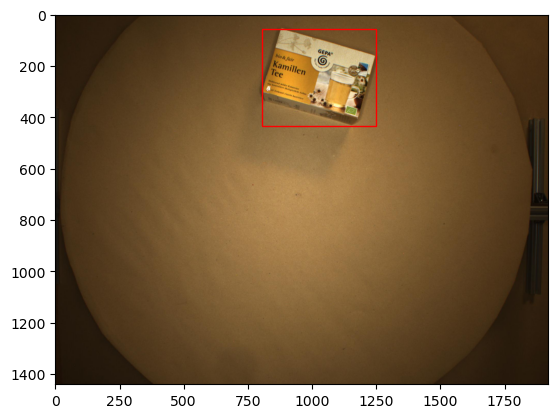

In [48]:
fig, ax = plt.subplots()
ax.imshow(img)

bbox = data['annotations'][0]['bbox']
rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=1, edgecolor='r', facecolor='none')

ax.add_patch(rect)

plt.show()

In [8]:
coco = COCO(f'combined_dict.json')

loading annotations into memory...
Done (t=0.71s)
creating index...
index created!


In [9]:
image_first = coco.imgs[200]
print(image_first)

{'file_name': 'D2S_000200.jpg', 'height': 1440, 'id': 200, 'license': 1, 'width': 1920}


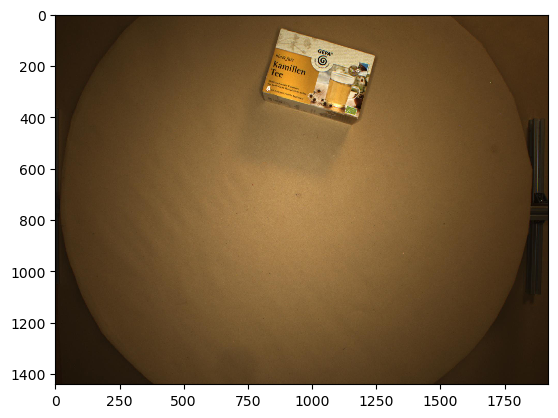

In [10]:
image = np.array(Image.open(os.path.join(image_dir, image_first['file_name'])))
plt.imshow(image, interpolation='nearest')
plt.show()

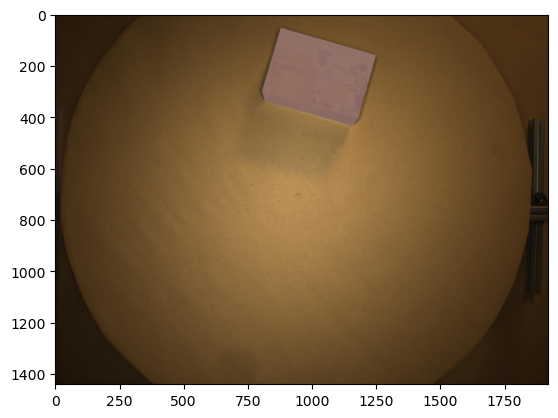

In [11]:
plt.imshow(image)
anns_ids = coco.getAnnIds(imgIds=image_first['id'], iscrowd=None)
anns = coco.loadAnns(anns_ids)
coco.showAnns(anns)

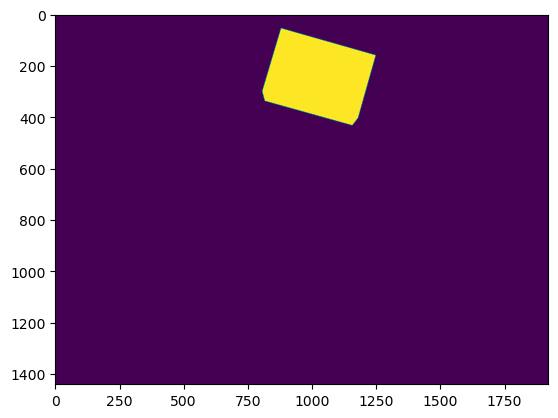

In [12]:
mask = coco.annToMask(anns[0])
for i in range(len(anns)):
    mask += coco.annToMask(anns[i])

plt.imshow(mask)